<a href="https://colab.research.google.com/github/MeemooMe/myFirstRepo/blob/master/TrafficDS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [7]:
# upload dataset files, the data is splitted into 2 files; accident characteritstics data file (caracteristiques-2019.csv) and drivers data file (usagers-2019.csv)
import io
from google.colab import files
uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)


Saving caracteristiques-2019.csv to caracteristiques-2019.csv
Saving usagers-2019.csv to usagers-2019.csv
saved file caracteristiques-2019.csv
saved file usagers-2019.csv


In [92]:
# read uploaded data using pd.read_csv, then store the data in df dataframe
# charcts_df ==> Accident characterstics 
# drivers_df ==> Drivers data

charcts_df = pd.read_csv(io.StringIO(uploaded['caracteristiques-2019.csv'].decode()), sep = ',')
drivers_df = pd.read_csv(io.StringIO(uploaded['usagers-2019.csv'].decode()), sep = ',')

In [ ]:
# show random dataframe content (5 rows) for the two datasets
charcts_df.sample(5)

In [ ]:
drivers_df.sample(5)

In [ ]:
# overview the two datasets, show basic stats
charcts_df.describe()

In [ ]:
drivers_df.describe()

In [ ]:
# check features (columns) types for the 2 datasets
charcts_df.dtypes

In [ ]:
drivers_df.dtypes

In [154]:
# change columns names from Frenc to English
charcts_df.rename(columns = {'Num_Acc': 'acc_id', 'jour': 'Day', 'mois':'Month', 'an':'Year','hrmn':'Hour_Mins', 'lum':'Light','dep':'Department', 'com':'Municipality','agg':'Location', 'int':'Intersection','atm':'Weather_cond', 'col':'Collison_type','adr':'Address', 'lat':'Latitude','long':'Longtitude'}, inplace = True)
drivers_df.rename(columns = {'Num_Acc': 'acc_id','catu':'user_category','grav':'injury_severity','sexe':'sex','an_nais':'Birth_year','trajet':'travel_reason','actp':'ped_action','etatp':'ped_company'}, inplace = True)

In [ ]:
# explore the data type at each series
charcts_df.dtypes

In [ ]:
drivers_df.dtypes

In [178]:
charcts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58286 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   acc_id         58286 non-null  int64         
 1   Day            58286 non-null  datetime64[ns]
 2   Month          58286 non-null  datetime64[ns]
 3   Year           58286 non-null  datetime64[ns]
 4   Hour_Mins      58286 non-null  float64       
 5   Light          58286 non-null  int64         
 6   Department     58286 non-null  object        
 7   Municipality   58286 non-null  object        
 8   Location       58286 non-null  int64         
 9   Intersection   58286 non-null  int64         
 10  Weather_cond   58286 non-null  int64         
 11  Collison_type  58286 non-null  int64         
 12  Address        58286 non-null  object        
 13  Latitude       58286 non-null  float64       
 14  Longtitude     58286 non-null  float64       
dtypes: datetime64[ns](3

In [179]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   acc_id           132977 non-null  int64 
 1   id_vehicule      132977 non-null  object
 2   num_veh          132977 non-null  object
 3   place            132977 non-null  int64 
 4   user_category    132977 non-null  int64 
 5   injury_severity  132977 non-null  int64 
 6   sex              132977 non-null  int64 
 7   Birth_year       132977 non-null  int64 
 8   travel_reason    132977 non-null  int64 
 9   secu1            132977 non-null  int64 
 10  secu2            132977 non-null  int64 
 11  secu3            132977 non-null  int64 
 12  locp             132977 non-null  int64 
 13  ped_action       132977 non-null  int64 
 14  ped_company      132977 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 15.2+ MB


In [ ]:
# check null values
charcts_df.isna().sum()

In [ ]:
drivers_df.isna().sum()

In [ ]:
#The output of characteristics dataest shows null values for all features except accident_id, such values are not significant nor appropriate for analysis. As the dataset size is quite large, we will remove such records.
# drop all rows with any NaN and NaT values
charcts_df = charcts_df.dropna()
charcts_df.isna().sum()

In [124]:
# However, the drivers dataset has no null values (checked above).

In [125]:
# check on columns 
charcts_df.columns

Index(['acc_id', 'Day', 'Month', 'Year', 'Hour_Mins', 'Light', 'Department',
       'Municipality', 'Location', 'Intersection', 'Weather_cond',
       'Collison_type', 'Address', 'Latitude', 'Longtitude'],
      dtype='object')

In [150]:
drivers_df.columns

Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'user_category',
       'injury_severity', 'sex', 'Birth_year', 'travel_reason', 'secu1',
       'secu2', 'secu3', 'locp', 'ped_action', 'ped_company'],
      dtype='object')

In [129]:
charcts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58286 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   acc_id         58286 non-null  object        
 1   Day            58286 non-null  datetime64[ns]
 2   Month          58286 non-null  datetime64[ns]
 3   Year           58286 non-null  datetime64[ns]
 4   Hour_Mins      58286 non-null  float64       
 5   Light          58286 non-null  float64       
 6   Department     58286 non-null  object        
 7   Municipality   58286 non-null  object        
 8   Location       58286 non-null  float64       
 9   Intersection   58286 non-null  float64       
 10  Weather_cond   58286 non-null  float64       
 11  Collison_type  58286 non-null  float64       
 12  Address        58286 non-null  object        
 13  Latitude       58286 non-null  float64       
 14  Longtitude     58286 non-null  float64       
dtypes: datetime64[ns](3

In [127]:
# convert the Day, Month, Year into datetime object 
charcts_df['Day'] = pd.to_datetime(charcts_df['Day'])
charcts_df['Month'] = pd.to_datetime(charcts_df['Month'])
charcts_df['Year'] = pd.to_datetime(charcts_df['Year'])

In [175]:
# to save memory and make it more efficient, change the following features types from float to int.
# Light: 5 types, Location: 2 types, Intersection: 9, Weather: 9, Collision: 6 types
charcts_df[['acc_id','Light', 'Location','Intersection','Weather_cond','Collison_type']] = charcts_df[['acc_id','Light', 'Location','Intersection','Weather_cond','Collison_type']].astype(int)
# Department and Municipality for some rows have some characters, so we will leave them as they are. Location is string. 

In [136]:
charcts_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58286 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   acc_id         58286 non-null  object        
 1   Day            58286 non-null  datetime64[ns]
 2   Month          58286 non-null  datetime64[ns]
 3   Year           58286 non-null  datetime64[ns]
 4   Hour_Mins      58286 non-null  float64       
 5   Light          58286 non-null  int64         
 6   Department     58286 non-null  object        
 7   Municipality   58286 non-null  object        
 8   Location       58286 non-null  int64         
 9   Intersection   58286 non-null  int64         
 10  Weather_cond   58286 non-null  int64         
 11  Collison_type  58286 non-null  int64         
 12  Address        58286 non-null  object        
 13  Latitude       58286 non-null  float64       
 14  Longtitude     58286 non-null  float64       
dtypes: datetime64[ns](3

In [155]:
# now check the drivers dataset.
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   acc_id           132977 non-null  int64 
 1   id_vehicule      132977 non-null  object
 2   num_veh          132977 non-null  object
 3   place            132977 non-null  int64 
 4   user_category    132977 non-null  int64 
 5   injury_severity  132977 non-null  int64 
 6   sex              132977 non-null  int64 
 7   Birth_year       132977 non-null  int64 
 8   travel_reason    132977 non-null  int64 
 9   secu1            132977 non-null  int64 
 10  secu2            132977 non-null  int64 
 11  secu3            132977 non-null  int64 
 12  locp             132977 non-null  int64 
 13  ped_action       132977 non-null  object
 14  ped_company      132977 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 15.2+ MB


In [152]:
# to save memory and make it more efficient, change the following features types from float to int.
        # user_category:   3 types
        # injury_severity (target):   	1. Unharmed, 2. Killed, 3. Injured hospitalized, 4. Slightly injured 
        # traverl_reason:  11 types (-1 not specified) 
        #                  -1 and 0 the same == not specified
        # sec1 sec2 sec3:  11 types (-1 not specified)
        #                  8 and 9 Other and not determinable == same?***
        # Localisation du piéton = Pedestrian location (-1 not specified)
        #                          -1 - Not specified, 0 - Not applicable, 9 - Unknown === same?***
        # ped_action:  alphanumeric (-1 not specified)
        #              between -1 to 9 and also, A and B
        #              -1 not specified, 0 not specified or not applicable, 9 other, B unknown ==== same?***
        # ped_company: 4 types (-1 not specified)        
        # charcts_df[['Light', 'Location','Intersection','Weather_cond','Collison_type']] = charcts_df[['Light', 'Location','Intersection','Weather_cond','Collison_type']].astype(int)
      

In [158]:
#print unique values in object columns to see data values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':    # only objects nd not numbers
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(drivers_df)

In [ ]:
drivers_df.replace('A','10',inplace=True)
drivers_df.replace('B','11',inplace=True)
print_unique_col_values(drivers_df)

In [168]:
drivers_df["ped_action"].replace({"A": "10", "B": "11"}, inplace=True)

In [ ]:
drivers_df.info()

In [171]:
drivers_df[['ped_action']] = drivers_df[['ped_action']].astype(int)

In [172]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   acc_id           132977 non-null  int64 
 1   id_vehicule      132977 non-null  object
 2   num_veh          132977 non-null  object
 3   place            132977 non-null  int64 
 4   user_category    132977 non-null  int64 
 5   injury_severity  132977 non-null  int64 
 6   sex              132977 non-null  int64 
 7   Birth_year       132977 non-null  int64 
 8   travel_reason    132977 non-null  int64 
 9   secu1            132977 non-null  int64 
 10  secu2            132977 non-null  int64 
 11  secu3            132977 non-null  int64 
 12  locp             132977 non-null  int64 
 13  ped_action       132977 non-null  int64 
 14  ped_company      132977 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 15.2+ MB


In [176]:
# Merge the two datasets into one
print(pd.merge(charcts_df, drivers_df, on='acc_id'))

              acc_id                           Day  ... ped_action ped_company
0       201900000001 1970-01-01 00:00:00.000000030  ...         -1          -1
1       201900000001 1970-01-01 00:00:00.000000030  ...         -1          -1
2       201900000001 1970-01-01 00:00:00.000000030  ...         -1          -1
3       201900000002 1970-01-01 00:00:00.000000030  ...         -1          -1
4       201900000003 1970-01-01 00:00:00.000000028  ...          0          -1
...              ...                           ...  ...        ...         ...
131688  201900058837 1970-01-01 00:00:00.000000027  ...         -1          -1
131689  201900058838 1970-01-01 00:00:00.000000030  ...         -1          -1
131690  201900058839 1970-01-01 00:00:00.000000030  ...         -1          -1
131691  201900058840 1970-01-01 00:00:00.000000029  ...          0          -1
131692  201900058840 1970-01-01 00:00:00.000000029  ...          0          -1

[131693 rows x 29 columns]


In [180]:
df = pd.merge(charcts_df, drivers_df, on='acc_id')

In [185]:
print(df.loc[df['acc_id'] == 201900000001])

         acc_id                           Day  ... ped_action ped_company
0  201900000001 1970-01-01 00:00:00.000000030  ...         -1          -1
1  201900000001 1970-01-01 00:00:00.000000030  ...         -1          -1
2  201900000001 1970-01-01 00:00:00.000000030  ...         -1          -1

[3 rows x 29 columns]


In [186]:
# Visualisation

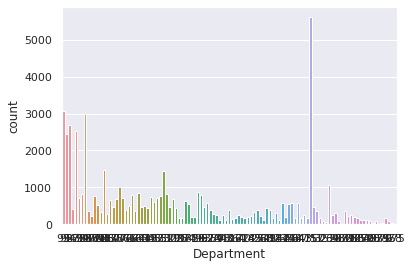

In [201]:
# plot Number of accidents per Municiapility
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Department", data=charcts_df)

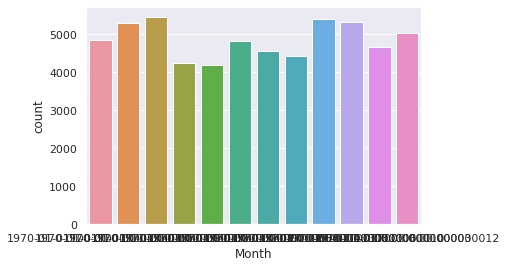

In [196]:
# plot Number of accidents per Month
ax = sns.countplot(x="Month", data=charcts_df)

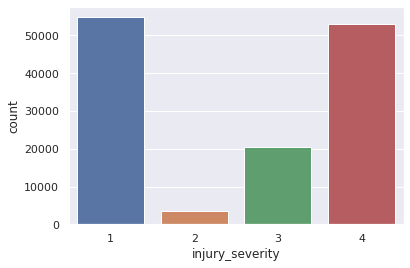

In [200]:
# plot injury_severity (the target) 
sns.countplot(x="injury_severity", data=df)

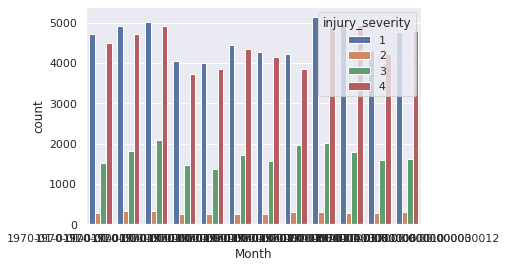

In [227]:
# plot injury_severity (the target) per month
ax = sns.countplot(x="Month", hue="injury_severity", data=df)

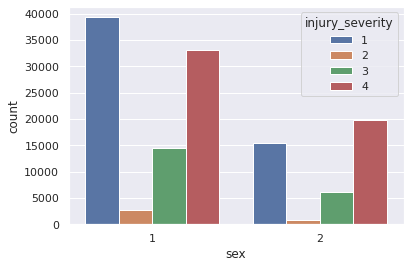

In [229]:
# plot injury_severity (the target) per gender
ax = sns.countplot(x="sex", hue="injury_severity", data=df)

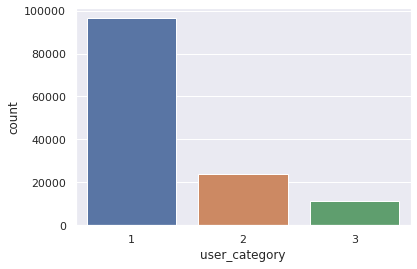

In [198]:
# plot user category
sns.countplot(x="user_category", data=df)

In [203]:
# Check correlation

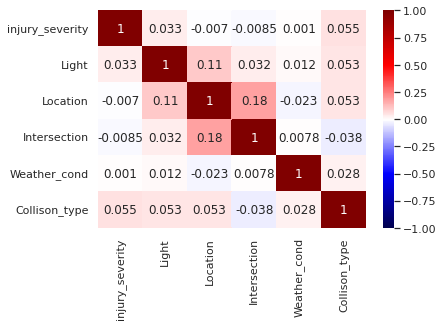

In [220]:
# correalte injury_severity and other features
df_correlation = df[["injury_severity","Month","Day","Light","Location","Intersection","Weather_cond","Collison_type","Department","Municipality"]]
#column_1 = df["injury_severity"]
#column_2 = df[["Month","Day","Light","Location","Intersection","Weather_cond","Collison_type","Department","Municipality"]]
#correlation = column_2.corr(column_1)
df_correlation.corr()
# corr matrix
sns.heatmap(df_correlation.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

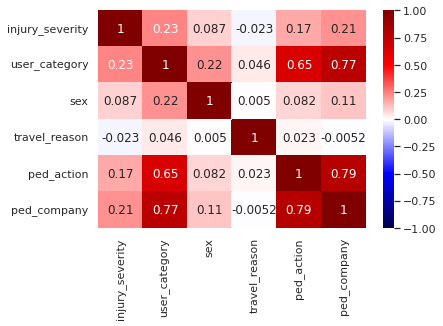

In [224]:
# correalte injury_severity and other features
df_correlation = df[["injury_severity","user_category","sex","travel_reason","ped_action","ped_company"]]
df_correlation.corr()
sns.heatmap(df_correlation.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [231]:
# user category and pedisterian have the strongest coorelation coefficient with injury severity. However, both are **still small**.

In [226]:
# Model
# Logistic regression with all features, this is a prelimiary model, STILL working on it
# Note: most of the features are categoriocal!

In [256]:
# evaluate a LogisticRegression model using all suitable features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
# Choose the predictor variables, here all but the first which is the response variable
X = df[['Month','Light','Location','Intersection','Weather_cond','Collison_type','sex','Department','Day']] #"user_category","sex","travel_reason","ped_action","ped_company", "Day"
# Choose the response variable(s)
y = df['injury_severity']
# format all fields as string
X = X.astype(str)


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 43.82


In [259]:
# As most of the features are categorical, we are built another linear regression model using Chi-Squared selected features

In [260]:
# evaluation of a model fit using chi squared input features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

# load the dataset
# Choose the predictor and response variables
X = df[['Month','Light','Location','Intersection','Weather_cond','Collison_type','sex']] #"user_category","sex","travel_reason","ped_action","ped_company", "Day"
y = df['injury_severity']
# format all fields as string
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 45.97
